### Work with missing data in a Python notebook

We are working with the lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for the month of August 2018.
The sample has two different datasets.
Lets iport the libraries and read the CSV before examining 

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\PRIYA SAVIO\Downloads\Files\Files\eda_missing_data_dataset1.csv")

In [4]:
df.head()

,date,center_point_geom,longitude,latitude,number_of_strikes
0,2018-08-01,POINT(-81.6 22.6),-81.6,22.6,48
1,2018-08-01,POINT(-81.1 22.6),-81.1,22.6,32
2,2018-08-01,POINT(-80.9 22.6),-80.9,22.6,118
3,2018-08-01,POINT(-80.8 22.6),-80.8,22.6,69
4,2018-08-01,POINT(-98.4 22.8),-98.4,22.8,44


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717530 entries, 0 to 717529
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               717530 non-null  object 
 1   center_point_geom  717530 non-null  object 
 2   longitude          717530 non-null  float64
 3   latitude           717530 non-null  float64
 4   number_of_strikes  717530 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 27.4+ MB


In [6]:
df.shape

(717530, 5)

In [7]:
# Read in second dataset
df_zip = pd.read_csv(r"C:\Users\PRIYA SAVIO\Downloads\Files\Files\eda_missing_data_dataset2.csv")

In [8]:
df_zip.head()

,date,zip_code,city,state,state_code,center_point_geom,number_of_strikes
0,2018-08-08,3281,Weare,New Hampshire,NH,POINT(-71.7 43.1),1
1,2018-08-14,6488,Heritage Village CDP,Connecticut,CT,POINT(-73.2 41.5),3
2,2018-08-16,97759,"Sisters city, Black Butte Ranch CDP",Oregon,OR,POINT(-121.4 44.3),3
3,2018-08-18,6776,New Milford CDP,Connecticut,CT,POINT(-73.4 41.6),48
4,2018-08-08,1077,Southwick,Massachusetts,MA,POINT(-72.8 42),2


In [10]:
df_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323700 entries, 0 to 323699
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   date               323700 non-null  object
 1   zip_code           323700 non-null  int64 
 2   city               323700 non-null  object
 3   state              323700 non-null  object
 4   state_code         323700 non-null  object
 5   center_point_geom  323700 non-null  object
 6   number_of_strikes  323700 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 17.3+ MB


In [12]:
df_zip.shape

(323700, 7)

The first includes five columns: 
date	center_point_geom	longitude	latitude	number_of_strikes

The second dataset contains seven columns:
date	zip_code	city	state	state_code	center_point_geom	number_of_strikes

The first dataset has two unique colums: longitude and latitude.

The second dataset has four unique columns: zip_code, city, state, and state_code.

There are three columns that are common between them: date, center_point_geom, and number_of_strikes.

In [13]:
# Left-join the two datasets
# merging two dataset by date and center point geom

df_joined = df.merge(df_zip, how= 'left', on= ['date','center_point_geom'])

In [14]:
df_joined.head()

,date,center_point_geom,longitude,latitude,number_of_strikes_x,zip_code,city,state,state_code,number_of_strikes_y
0,2018-08-01,POINT(-81.6 22.6),-81.6,22.6,48,NaN,NaN,NaN,NaN,NaN
1,2018-08-01,POINT(-81.1 22.6),-81.1,22.6,32,NaN,NaN,NaN,NaN,NaN
2,2018-08-01,POINT(-80.9 22.6),-80.9,22.6,118,NaN,NaN,NaN,NaN,NaN
3,2018-08-01,POINT(-80.8 22.6),-80.8,22.6,69,NaN,NaN,NaN,NaN,NaN
4,2018-08-01,POINT(-98.4 22.8),-98.4,22.8,44,NaN,NaN,NaN,NaN,NaN


In [17]:
df_joined.shape

(717530, 10)

In [18]:
df_joined.size

7175300

In [19]:
df_joined.describe()

,longitude,latitude,number_of_strikes_x,zip_code,number_of_strikes_y
count,717530.000000,717530.000000,717530.000000,323700.000000,323700.000000
mean,-90.875445,33.328572,21.637081,57931.958996,25.410587
std,13.648429,7.938831,48.029525,22277.327411,57.421824
min,-133.900000,16.600000,1.000000,1002.000000,1.000000
25%,-102.800000,26.900000,3.000000,38260.750000,3.000000
50%,-90.300000,33.200000,6.000000,59212.500000,8.000000
75%,-80.900000,39.400000,21.000000,78642.000000,24.000000
max,-43.800000,51.700000,2211.000000,99402.000000,2211.000000


In [20]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717530 entries, 0 to 717529
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 717530 non-null  object 
 1   center_point_geom    717530 non-null  object 
 2   longitude            717530 non-null  float64
 3   latitude             717530 non-null  float64
 4   number_of_strikes_x  717530 non-null  int64  
 5   zip_code             323700 non-null  float64
 6   city                 323700 non-null  object 
 7   state                323700 non-null  object 
 8   state_code           323700 non-null  object 
 9   number_of_strikes_y  323700 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 54.7+ MB


In [28]:
# Create a new df of just the rows that are missing data

df_null_geo = df_joined[pd.isnull(df_joined.state)] #creating a mask of is_null in the df_joined using a particular column (any null column can be used)

In [29]:
df_null_geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393830 entries, 0 to 717529
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 393830 non-null  object 
 1   center_point_geom    393830 non-null  object 
 2   longitude            393830 non-null  float64
 3   latitude             393830 non-null  float64
 4   number_of_strikes_x  393830 non-null  int64  
 5   zip_code             0 non-null       float64
 6   city                 0 non-null       object 
 7   state                0 non-null       object 
 8   state_code           0 non-null       object 
 9   number_of_strikes_y  0 non-null       float64
dtypes: float64(4), int64(1), object(5)
memory usage: 33.1+ MB


In [30]:
df_null_geo.head()

,date,center_point_geom,longitude,latitude,number_of_strikes_x,zip_code,city,state,state_code,number_of_strikes_y
0,2018-08-01,POINT(-81.6 22.6),-81.6,22.6,48,NaN,NaN,NaN,NaN,NaN
1,2018-08-01,POINT(-81.1 22.6),-81.1,22.6,32,NaN,NaN,NaN,NaN,NaN
2,2018-08-01,POINT(-80.9 22.6),-80.9,22.6,118,NaN,NaN,NaN,NaN,NaN
3,2018-08-01,POINT(-80.8 22.6),-80.8,22.6,69,NaN,NaN,NaN,NaN,NaN
4,2018-08-01,POINT(-98.4 22.8),-98.4,22.8,44,NaN,NaN,NaN,NaN,NaN


Now that we've merged all of our data together and isolated the rows with missing data, we can better understand what data is missing by plotting the longitude and latitude of locations that are missing city, state, and zip code data.

In the above dataset df_null_geo we have filtered the the data based on null values. the state, state code, city zip has null values. we are going to plot based on the center_point_geom which has null values and understand why this has huge missing values

In [35]:
# Grouping the data based on the Latitute and Longitude on the df_null_geo dataset

top_missing = df_null_geo[['latitude','longitude','number_of_strikes_x']].groupby(['latitude','longitude']).sum(numeric_only = True).sort_values(by='number_of_strikes_x',ascending=False).reset_index()

In [36]:
top_missing.head()

,latitude,longitude,number_of_strikes_x
0,22.4,-84.2,3841
1,22.9,-82.9,3184
2,22.4,-84.3,2999
3,22.9,-83.0,2754
4,22.5,-84.1,2746


##### Creating visualization for the missing data with scatter plot as we have latitude and longitude data

In [38]:
import plotly.express as px

We are using express in order to make the process quicker. unlike static graphs like bar graph histogram scatter plot generates visualization for each point and interactive so express allows to compute much faster

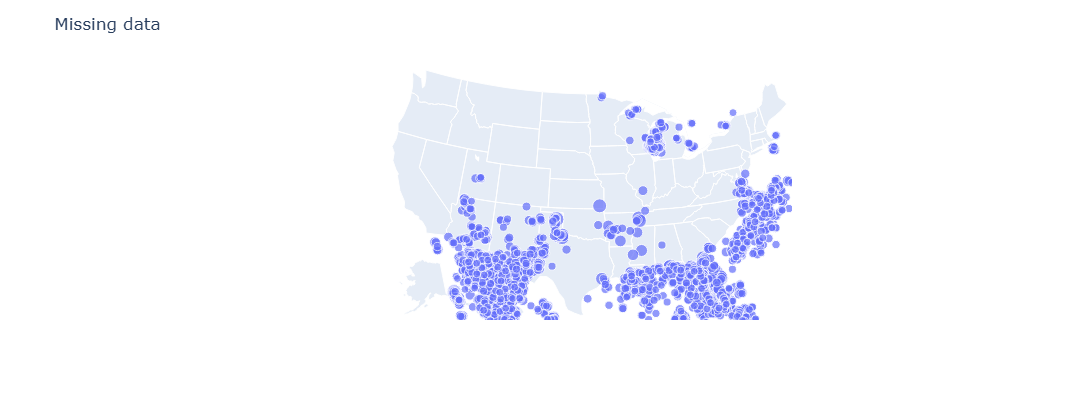

In [43]:
fig = px.scatter_geo(top_missing[top_missing['number_of_strikes_x']>300], #this allows only the lat and long of strikes over 300
                     lat = 'latitude',
                     lon = 'longitude',
                     size = 'number_of_strikes_x',
                    width= 600,
                    height= 400)
fig.update_layout(
    title_text = 'Missing data', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

fig.show()

The missing values for zip code, state, and state code suggest that the lightning strike coordinates (latitude and longitude) are located over the sea. As a result, these records cannot be associated with any geographic region and are not possible to fill.

During the missing value analysis, we found that most of these gaps are unresolvable because the strike locations fall outside land boundaries, making it impossible to map them to a valid zip code.